**Assignment 3**

GitHub User Name: lbelmanw

Email: livia_belman-wells@brown.edu

Worked with Angela White and Justin Voelker

**Problem 1**

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from numba import jit
import matplotlib.cm as cm

from mpl_toolkits.mplot3d import Axes3D
import random
import os

import scipy.stats as scip

In [3]:
def randomwalk(nstep, nsample):
    x = np.zeros([nsample,nstep])
    y = np.zeros([nsample,nstep])
    z = np.zeros([nsample,nstep])
    
    for i in range(nsample):
        d = 2*np.random.randint(0,1+1, nstep-1) -1 #radial
        a1 = (np.random.uniform(0,180, nstep-1)-90)*(np.pi/180) #azimuthal
        a2 = (np.random.uniform(0,180, nstep-1)-90)*(np.pi/180) #polar
        x0 = d*np.cos(a1)*np.sin(a2)
        y0 = d*np.sin(a1)*np.sin(a2)
        z0 = d*np.cos(a2)
        
        x0 = np.insert(x0,0,0,axis= 0)
        y0 = np.insert(y0,0,0,axis= 0)
        z0 = np.insert(z0,0,0,axis= 0)
        
        x0 = np.cumsum(x0)
        y0 = np.cumsum(y0)
        z0 = np.cumsum(z0)
        
        x[i,:] = x0
        y[i,:] = y0
        z[i,:] = z0
        
    return x, y, z

Best Fit Line: Slope =  0.941980464017 , $r^2$ =  0.993828885748


32512

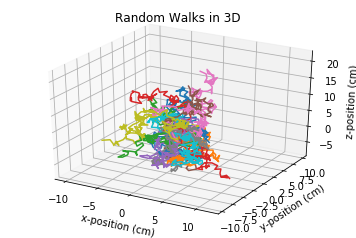

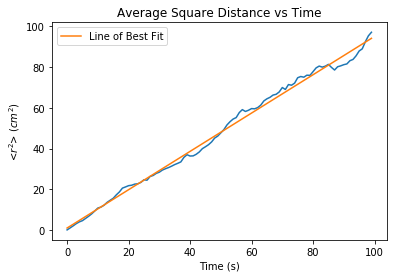

In [13]:
sample = 100
steps = int(1e2)
x, y, z = randomwalk(steps,sample)

fig = plt.figure()
ax = plt.axes(projection='3d')

for i in range(int(sample/5)):
    # Data for a three-dimensional line
    ax.plot3D(x[5*i,:],y[5*i,:],z[5*i,:])

ax.set_xlabel('x-position (cm)')
ax.set_ylabel('y-position (cm)')
ax.set_zlabel('z-position (cm)')
ax.set_title('Random Walks in 3D')
#Calculate <r^2>
r_square = np.zeros([steps])

for s in range(steps):
    r_x = x[:,s]
    r_y = y[:,s]
    r_z = z[:,s]
    x2 = np.sum(r_x**2)/len(r_x)
    y2 = np.sum(r_y**2)/len(r_y)
    z2 = np.sum(r_z**2)/len(r_z)
    r2 = x2 + y2 + z2
    r_square[s] = r2
    

fig2 = plt.figure()    
time = np.arange(0,steps)
plt.plot(time,r_square)
plt.title('Average Square Distance vs Time')
plt.xlabel('Time (s)')
plt.ylabel('<$r^2$> ($cm^2$)')
m,b,r,p,sd = scip.linregress(time,r_square)
plt.plot(time,(m*time)+b, label = 'Line of Best Fit')
print('Best Fit Line: Slope = ', m, ', $r^2$ = ', r**2)
plt.legend(loc = 2)

os.system('cls')

After finding the path for 100 walkers over 1,000,000 steps and then plotting their distance square from the origin I found a linear fit. The r^2 value for this fit was 0.994 and the coefficient b in the equation $<r^2> = bt$ was 0.942.

**Problem 2**

In [14]:
def boxwalk(nstep, nsample, wall, gap):
    nstep = int(nstep)
    nsample = int(nsample)
    x = np.zeros([nsample,nstep])
    y = np.zeros([nsample,nstep])
    escape = np.zeros([nsample,nstep])

    for i in range(nsample):
        x[i,0] = 0
        y[i,0] = 0
        for s in range(1,nstep):
            d = 2*np.random.randint(0,1+1,1) -1 #radial
            a1 = (np.random.randint(0,180,1)-90)*(np.pi/180) #azimuthal
            x0 = d*np.cos(a1)
            y0 = d*np.sin(a1)
            
            x0 += x[i,s-1] + x0
            y0 += y[i,s-1] + y0
            
            if(escape[i,s-1] == 0):
                #Stuck in box
                if(abs(x0)>wall/2):
                    x0 = x[i,s-1]
                if(abs(y0) > wall/2):
                    if(y0 > wall/2 and abs(x0) < gap/2):
                        escape[i,s:] = 1
                    else:
                        y0 = y[i,s-1]
            
            else:
                #FREEE!!!!
                if(abs(x0) < wall/2 and abs(y0) < wall/2):
                    x0 = x[i,s-1]
                    y0 = y[i,s-1]
                
            x[i,s] = x0
            y[i,s] = y0
            
    return x, y, escape

Best Fit Line: Slope =  -0.000104294231412 , r^2 =  0.992594903326


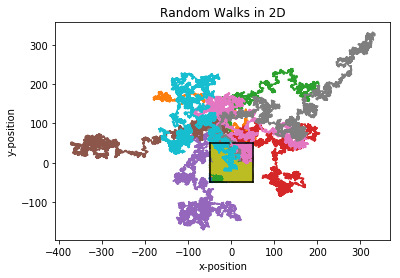

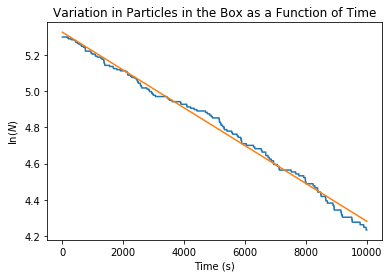

In [18]:
step = 10000
sample = 2e2
wall = 100
gap = 10

x, y, escape = boxwalk(step,sample,wall, gap)

for i in range(int(sample/20)):
    plt.plot(x[20*i,:],y[20*i,:])
os.system('cls')

plt.plot(np.linspace(-wall/2,wall/2,num=100,endpoint=True),np.ones(100)*(-wall/2),color = 'k')
plt.plot(np.linspace(-wall/2,-gap/2,num=100,endpoint=True),np.ones(100)*(wall/2), color = 'k')
plt.plot(np.linspace(gap/2,wall/2,num=100,endpoint=True),np.ones(100)*(wall/2), color = 'k')
plt.plot(np.ones(100)*(-wall/2),np.linspace(-wall/2,wall/2,num=100,endpoint=True), color = 'k')
plt.plot(np.ones(100)*(wall/2),np.linspace(-wall/2,wall/2,num=100,endpoint=True), color = 'k')

plt.title('Random Walks in 2D')
plt.xlabel('x-position')
plt.ylabel('y-position')

fig2 = plt.figure()  
time = np.arange(0,step)
e = np.zeros(step)
for i in range(step):
    e[i] = np.sum(escape[:,i])
    
plt.plot(time,np.log(sample - e))
m,b,r,p,sd = scip.linregress(time,np.log(sample - e))
plt.plot(time,(m*time)+b, label = 'Line of Best Fit')
plt.xlabel('Time (s)')
plt.ylabel('$\ln{(N)}$')
plt.title('Variation in Particles in the Box as a Function of Time')
print('Best Fit Line: Slope = ', m, ', r^2 = ', r**2)

I simulate a number of random walks of particles inside a box, where particles can leave through a small gap, but cannot reenter. The number of particles in this box at any given time is govered by $N\propto e^{\frac{-t}{\tau}}$
Taking the log of both sides we find that $\ln{(N)}\propto \frac{-t}{\tau}$
After graphing the log of particles in the box versus time we find a linear fit with $m=-0.000104294231412$ and an $r^2=0.992594903326$. 
From there we can find $\tau=9588$ meaning that the time constant for escape is 9,588 seconds.

**Problem 3**

$$I = \int_{0}^{1} \frac{x^{\frac{-1}{2}}}{e^x+1}$$
The weighting given is $w(x)=x^{\frac{-1}{2}}$, from this we can calculate the probability distribution we want for our randomly chosen x values:
$$p(x) = \frac{w(x)}{\int_{0}^{1}w(x)dx}=\frac{x^{\frac{-1}{2}}}{2(1-0)}=\frac{1}{2\sqrt{x}}$$
We can then find qn equation to transform a uniform probability distribution into this form: $$F(y)=\left|\int_{0}^{1}p(y)dy\right|=\left|\int_{0}^{1}\frac{1}{2}y^{\frac{-1}{2}}dy\right|=\sqrt{y}=x$$ therefor to transform our probability distribution we should transform our uniform x distribution into the non-uniform distribution using the equation: $$y=x^2$$ Once we have this non-uniform distribution we can find the integral using $$I\sim\frac{1}{N}\sum_{i=1}^{N}\frac{f(x)}{p(x)}$$
$f(x)=\frac{x^{\frac{-1}{2}}}{e^x+1}$ and $p(x)=\frac{1}{2}x^{\frac{-1}{2}}$ therefor we find: $$I\sim\frac{1}{N}\sum_{i=1}^{N}\frac{\frac{x^{\frac{-1}{2}}}{e^x+1}}{\frac{1}{2}x^{\frac{-1}{2}}}=\frac{1}{N}\sum_{i=1}^{N}\frac{2}{e^x+1}$$
Plugging that in below, and running the code we find an answer quite close to the expected value, 0.84.

In [19]:
sample = int(1e6)
r1 = np.random.random(sample)**2 #Get a uniform distribution then transform it
F = (1/sample)*np.sum(2/(np.exp(r1)+1)) #F = average of sum of f(x)/p(x)
print('The integral is equal to ', F)

The integral is equal to  0.838792053025
